<CENTER>
<img src="https://secure.meetupstatic.com/photos/theme_head/d/9/1/7/full_7435575.jpeg" width="100%">

  <header>
    <h1>Python Data Science</h1>
    <h3>18 Octubre 2017</h3>
    <h2>@victormartin</h2>
    <p></p>
  </header>
</CENTER>

In [32]:
%matplotlib inline

import pandas as pd
import numpy as np

import os
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (16, 6)

import seaborn as sns

sns.set_context("notebook", font_scale=1.4)
sns.set_style("whitegrid")


# Contingut d'aquesta xerrada

- Data Science i Machine Learning
- Per què Python?
- Kaggle.com - Plataforma de competicions de data science
- Titanic - Getting Started competition


Per veure aquest notebook en format de presentació (Reveal.js):

```
$jupyter nbconvert datascience_introduction.ipynb --to slides --post serve
```

# Què vol dir *data science*?

> *Anàlisis de dades aplicant mètodes científics per tal d'extraure coneixement*
>
> [Definició de Wikipedia](https://en.wikipedia.org/wiki/Data_science])


Del reconeixement de patrons ha evolucionat cap al *machine learning* -> algorismes d'aprenentatge

# Què vol dir *machine learning*?

> *Camp d'estudi que dona a les computadores la habilitat d'aprendre sense haber estat explícitament programades*
>
> Arthur Samuel - 1959

Básicament son algorismes que aprenen i fan prediccions sobre dades. 

# Diferents tipus de algoritmes de aprenentatge

- [Supervised learning](https://en.wikipedia.org/wiki/Supervised_learning): Predir una dada desconeguda, a partir de dades d'entrenament (conegudes)
- [Unsupervised learning](https://en.wikipedia.org/wiki/Unsupervised_learning)
- [Reinforcement learning](https://en.wikipedia.org/wiki/Reinforcement_learning)
- [Recommender systems](https://en.wikipedia.org/wiki/Recommender_system)

### Mega-links:

- Curs [Introduction to Machine Learning](https://www.coursera.org/learn/machine-learning) de Andrew Ng a Coursera - Aquí **[un bon resum/apunts](http://www.holehouse.org/mlclass/)** pels més mandrosos ;)


# Exemple aprenentatge supervisat



### Predicció de preu de venda de pisos

In [33]:
dades = {
    u'Superfície (m2)': [50,70,100,130,200],
    u'Preu (€)': [50000,55000,190000,220000,300000],
}
df_training = pd.DataFrame(dades)
df_training

,Preu (€),Superfície (m2)
0,50000,50
1,55000,70
2,190000,100
3,220000,130
4,300000,200


** <small>Bon moment per recuperar els slides <a href="https://github.com/victormartingarcia/2017-pyGrn-intropandas" target="_blank">"Intro to Pandas"</a> :)</small>

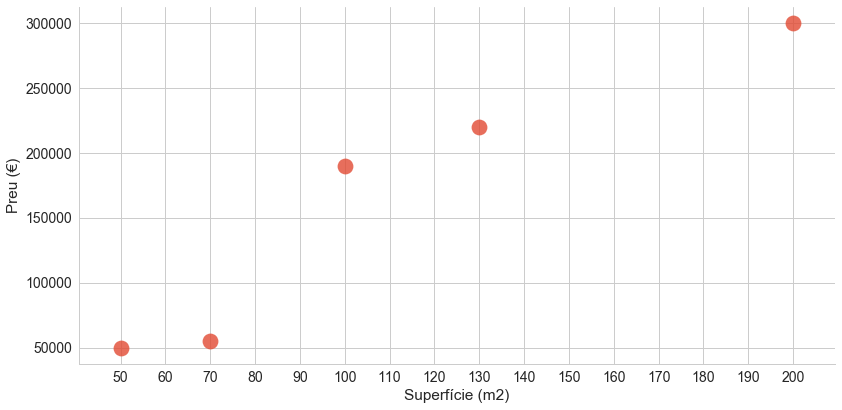

In [34]:
# Dibuixem les dades d'entrenament
sns.lmplot(x=u'Superfície (m2)',
           y=u'Preu (€)',
           data=df_training, # Data source
           fit_reg=False, # Don't fix a regression line
           size=6,
           aspect=2,
           scatter_kws={"s": 250}
).set(xticks=np.arange(50,201,10));

**Quant puc demanar per un pis de 90m2?**

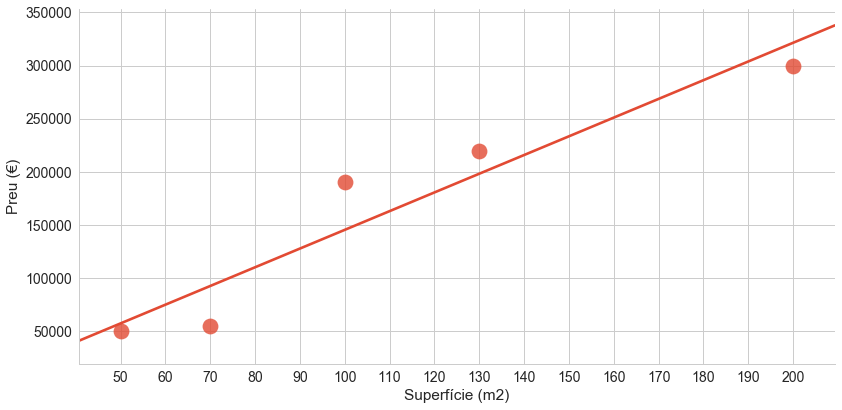

In [35]:
# Dibuixem les dades d'entrenament -> REGRESSIÓ LINEAL
sns.lmplot(x=u'Superfície (m2)',
           y=u'Preu (€)',
           data=df_training, # Data source
           fit_reg=True, # Fix a regression line
           ci=0,
           size=6,
           aspect=2,
           scatter_kws={"s": 250}
).set(xticks=np.arange(50,201,10));

**Segons aquest model, per un pis de 90m2 puc demanar 130 000€**

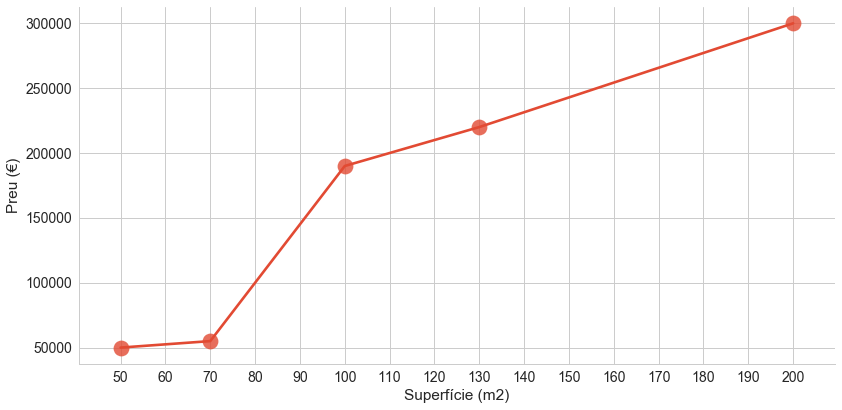

In [36]:
# Dibuixem les dades d'entrenament -> Un altre algorisme predictiu
sns.lmplot(x=u'Superfície (m2)',
           y=u'Preu (€)',
           data=df_training, # Data source
           lowess=True, # Fix a logistic line
           ci=0,
           size=6,
           aspect=2,
           scatter_kws={"s": 250}).set(xticks=np.arange(50,201,10));

**WTF!!** Segons aquest altre model, per un pis de 90m2 puc demanar 150 000€ ( 20k € més!). Quin és el bò?

# Objectiu: Crear un model que *generalitzi*

Per *generalització* entenem que el model s'ajusti a TOTES les dades Out-sample, no només a les dades in-sample del training set.

<center>
<img src="https://www.netquest.com/hubfs/Imported_Blog_Media/data.png" width="60%"/>
<p align="center">Funció sin(2πx)</p>
</center>

# Underfitting i Overfitting
<center>
<img src="https://www.netquest.com/hubfs/Imported_Blog_Media/4modelos1.png" width="100%"/>
<p align="center">M = Ordre del polinomi</p>
</center>

# "La prueba del algodón": Cross-Validation

Per saber si un model generalitza, s'ha de probar amb dades noves (out-of-sample). 

**Cross-Validation**: 

1. Separar el dataset en 2 conjunts (p.ex. 70%/30% de les dades)
1. Entrenarem el nostre model amb el primer conjunt (**training set**)
1. Aplicarem el model al segon conjunt (**validation set**)
1. Mesurarem el *performance* del nostre model amb qualsevol [métrica d'evaluació](http://scikit-learn.org/stable/modules/model_evaluation.html)



<center>
<img src="https://www.netquest.com/hubfs/Imported_Blog_Media/errorvsm.png" width="70%"/>
</center>

# Training de models

Gran part del machine learning es basa en el [Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent): Algorisme de minimització d'una funció de manera iterativa


<center>
<img src="https://alykhantejani.github.io/images/gradient_descent_line_graph.gif" width="100%"/>
</center>

# Algoritmes d'aprenentatge supervisat

<center>
<img src="https://udarajay.com/content/images/2017/10/machinelearningalgorithms.png" width="100%"/>
</center>

# Random Forest

> When in doubt, use [Random Forest](https://en.wikipedia.org/wiki/Random_forest) — the go-to machine learning algorithm that is considered to be one of the most effective and versatile in solving almost any prediction task
>
> Rebecca Merrett, TechWorld Australia

##Mega-links sobre introducció als algorismes de ML:##

- [Visualització/Exemple de arbres de decisió](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
- [Essentials of Machine Learning algorithms](https://www.analyticsvidhya.com/blog/2017/09/common-machine-learning-algorithms/)

# Worflow per afrontar un problema de machine learning

<center>
<img src="https://udarajay.com/content/images/2017/10/17-038-ml-concept_0.jpg" width="90%"/>
</center>

## Mega-links sobre aplicació pràctica de ML:


- [Advice for applying Machine Learning](http://www.holehouse.org/mlclass/10_Advice_for_applying_machine_learning.html): Apunts del curs Introduction de Machine Learning de Coursera
- [Machine Learning Systems Design](http://www.holehouse.org/mlclass/11_Machine_Learning_System_Design.html): Apunts del curs Introduction de Machine Learning de Coursera
- [Best Practices for ML Engineering](http://martin.zinkevich.org/rules_of_ml/rules_of_ml.pdf): Escrit per un enginyer de Google (PDF)



# Per què Python?

* Históricament s'ha utilitzat llenguatges i eines com R, Matlab/Octave, Mathematica ...

La comunitat Python ha sapigut agafar el bò i millor d'aquestes eines:

* Anàlisis numèric Matlab -> **numpy**
* R dataframes -> **pandas**
* Matlab plotting -> **matplotlib**
* Mathematica notebooks -> **jupyter notebooks**
* R caret -> **scikit-learn**
* (...)

# [Kaggle.com](www.kaggle.com)

Competicions de datascience amb regles senzilles:

- Cada competició té 2 datasets públics: **training** (labeled) i **test**


- Els participants han de pujar un fitxer .CSV amb els camps ID (del test) i TARGET (la seva predicció). Aquest upload se'n diu **submission**

- Sobre un percentatge d'aquestes prediccions, s'evaluen l'accuracy mitjançant la [mètrica de la competició](https://www.kaggle.com/wiki/Metrics), i el submission apareix en el **public leaderboard**

- Quan acaba el termini de la competició, s'evaluen tots els submissions amb la resta de dades del **test set**, i es crea un **private leaderboard** que determina els guanyadors finals.

# Kaggle Tips and Tricks

- Fòrum de les competicions
- [Blog de Kaggle](http://blog.kaggle.com/) amb entrevistes a guanyadors de competicions concloses
- **Ensembles** -> Teaming

# Competició Getting Started: Titanic

- El 15 d'Abril de 1912 es va enfonsar el Titanic debut a la col.lisió amb un iceberg.
- Van morir 1502 de les 2224 persones que viatjaven a bord (entre passatgers i tripulació)
- Una de les raons es que no hi havia els suficients bots salvavides
- Tot i el component de sort, hi van haver grups amb més possibilitats de sobreviure que d'altres (dones, nens, passatgers de primera classe...)




** Problema de classificació binària:** Per cada passatger, hem de determinar si es va salvar o no

In [37]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = 16, 12
import matplotlib
matplotlib.style.use('ggplot')

from sklearn.model_selection import cross_val_score

# 1/5 - Carregar les dades

Info pública sobre el dataset: https://www.kaggle.com/c/titanic/data

In [38]:
# Training set
df_train = pd.read_csv('data/train.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [39]:
# 6 passatgers a l'atzar
df_train.sample(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
440,441,1,2,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",female,45.0,1,1,F.C.C. 13529,26.2500,NaN,S
695,696,0,2,"Chapman, Mr. Charles Henry",male,52.0,0,0,248731,13.5000,NaN,S
181,182,0,2,"Pernot, Mr. Rene",male,NaN,0,0,SC/PARIS 2131,15.0500,NaN,C


# 2/5 - Preparar les dades

In [40]:
# TODO: Mínimo para que funcione el modelo

# eliminar columnes innecesàries
df_train = df_train.drop(["PassengerId", "Cabin", "Ticket"], axis=1)

# emplenar NaN
df_train = df_train.fillna(df_train.mean())

In [41]:
df_train.sample(6)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
284,0,1,"Smith, Mr. Richard William",male,29.699118,0,0,26.0000,S
725,0,3,"Oreskovic, Mr. Luka",male,20.000000,0,0,8.6625,S
386,0,3,"Goodwin, Master. Sidney Leonard",male,1.000000,5,2,46.9000,S
198,1,3,"Madigan, Miss. Margaret ""Maggie""",female,29.699118,0,0,7.7500,Q
71,0,3,"Goodwin, Miss. Lillian Amy",female,16.000000,5,2,46.9000,S
128,1,3,"Peter, Miss. Anna",female,29.699118,1,1,22.3583,C


# 3/5 - Feature engineering

Ho guardem per més tard ;)

# 4/5 Creació i validació del model 

In [42]:
# TODO: Hacer Linear Regression y Random Forest
'''
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier(n_estimators=100)
scores_RF = cross_val_score(clf_RF, df_train.drop("Survived", axis=1), df_train["Survived"], cv=5)

print("RF Accuracy: %0.2f (+/- %0.2f)" % (scores_RF.mean(), scores_RF.std() * 2))
'''

'\nfrom sklearn.ensemble import RandomForestClassifier\n\nclf_RF = RandomForestClassifier(n_estimators=100)\nscores_RF = cross_val_score(clf_RF, df_train.drop("Survived", axis=1), df_train["Survived"], cv=5)\n\nprint("RF Accuracy: %0.2f (+/- %0.2f)" % (scores_RF.mean(), scores_RF.std() * 2))\n'

# 5/5 Submission

## Gràcies per escoltar! Preguntes?


- https://github.com/victormartingarcia
- <mailto:victor.martin.garcia@gmail.com>
- [@victormartin](https://twitter.com/victormartin)


Slides and data: Source: https://github.com/victormartingarcia/2017-pyGrn-introdatascience

Slides presented with 'live reveal' https://github.com/damianavila/RISE
